In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/Artificial_Intelligence_Engineering/AIA/2_CarPricesData.pkl")

In [ ]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [ ]:
df.isnull().sum()

Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64

In [ ]:
df.groupby("Doors")['Weight'].max()

Doors
2    1115.0
3    1320.0
4    1160.0
5    1320.0
Name: Weight, dtype: float64

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


<Axes: xlabel='Age'>

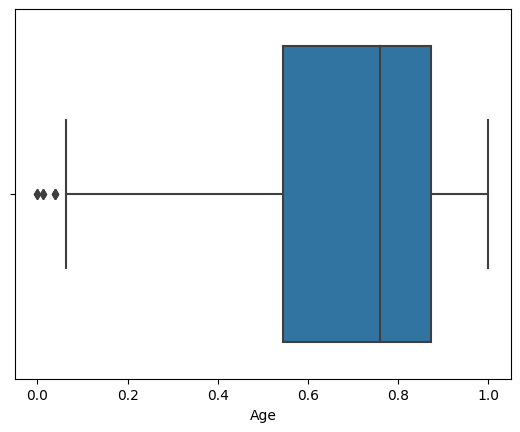

In [ ]:
# Handling outliers
# Task

import seaborn as sns

sns.boxplot(x='Age',data=df)

In [ ]:
# Spiting data
X = df.iloc[:,:-1]
y = df['Price']

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


In [ ]:
1076/20

53.8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 100.9 KB


In [ ]:
df['Price'] = df['Price'].astype('float32')

In [ ]:
y_train = y_train.astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   float32
dtypes: float32(1), float64(5), int64(2)
memory usage: 95.3 KB


In [ ]:
# Model building
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import r2_score

model = Sequential()
model.add(Dense(units=16,input_dim=7,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units = 32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='he_uniform'))

model.compile(loss='mean_squared_error',optimizer='adam', metrics=[tf.keras.metrics.R2Score()])
model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1)

Epoch 1/10
54/54 [==============================] - 2s 2ms/step - loss: 128023800.0000 - r2_score: -8.8580
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 126788160.0000 - r2_score: -8.7629
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 121825184.0000 - r2_score: -8.3807
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 107228496.0000 - r2_score: -7.2567
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 77494536.0000 - r2_score: -4.9672
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 40370348.0000 - r2_score: -2.1086
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 19044962.0000 - r2_score: -0.4665
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 15215584.0000 - r2_score: -0.1716
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 14978355.0000 - r2_score: -0.1534
Epoch 10/10
54/54 [=======================

In [ ]:
# Do EDA and domain analysis
# Check if you have outliers
# Try other scaling option
# Increase the hidden layers
# train for more epochs---- 100

In [ ]:
y_test = y_test.astype("float32")

In [ ]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 13872646.0000 - r2_score: -0.0596


[13872646.0, -0.05955910682678223]